### Investigate null dates in scored_datetime

In [1]:
%%capture

%run '../lib/libraries.ipynb'
from ..lib import utilities as util
from pyspark.sql import functions as F

In [2]:
filterDf  = util.load_df('filterDf')

###### Create Dataframe of null observations

In [3]:
nullDf = filterDf.filter(F.col('scored_datetime').isNull())

nullDf.count()

1438

1,438 null observations

###### Display distinct values

In [4]:
util.distinct_val(nullDf)

,0
assignment_attempt_number (aa),1
assignment_max_attempts (a),1
final_score_unweighted (aa),0
is_manual_scoring_required (aa),False
item_is_offline_scored (i),False
scored_datetime (aa),NaT


- final_score_unweighted = 0
  - Assessment attempts has no score
  - raw_score is not zero
    - item answered but total assessment not
- scored_datetime = null (NaT)
  - not scored

###### Compare dates with full sample

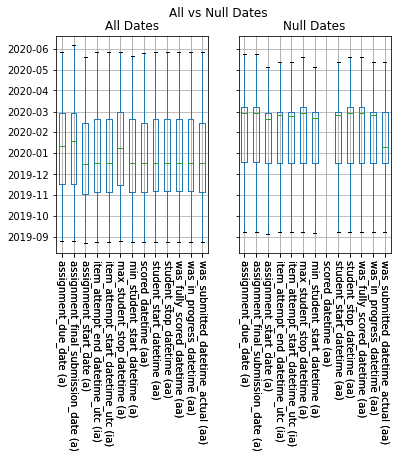

In [5]:
util.dual_date_boxplot(
    util.get_random_sample(filterDf),
    nullDf,
    title1="All Dates",
    title2='Null Dates',
    main='All vs Null Dates'
)

- Majority scheduled between 12/15 and 3/15
    - Median around 3/2020

##### Conclusion
- Null because assessment not scored
  - item is answered though
- No further action required
  - variable won't be used

In [6]:
util.finish_todo('Investigate null dates in scored_datetime')

Finished: Investigate null dates in scored_datetime
